<span style="font-size:xx-large;">**Culturas Permanentes - Artigo**</span>

<span style="font-size:x-large;">**1 - Importar Bibliotecas**</span>

In [1]:
import rasterio
import pandas as pd
import geopandas as gpd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import glob

from collections import defaultdict
from rasterio.mask import mask
from scipy.stats import entropy
from shapely.geometry import shape
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
%matplotlib inline
labels = []

<span style="font-size:x-large;">**2 - Nomear ficheiros de entrada e de saída**</span>

In [2]:
'''
NOMEAR OS DIVERSOS FICHEIROS DE ENTRADA E SAIDA. São eles:

'''

NOME = '17_05_2025'

'''
Outros
'''
#7
CPUsselecionados = 12
#8
Correlação = 0

<span style="font-size:x-large;">**3 - Preencher valores NaN**</span>

In [3]:
# Inicializa uma lista para armazenar os DataFrames
dfs = []

# Loop pelos arquivos CSV e lê cada um em um DataFrame
for file in glob.glob('*.csv'):
    df = pd.read_csv(file)
    # Adiciona uma coluna com o nome do arquivo (sem o caminho completo)
    df['filename'] = file.split('/')[-1]  # Use '\\' se estiver no Windows
    
    dfs.append(df)

# Concatena todos os DataFrames em um único DataFrame
sample_data_NaN = pd.concat(dfs, ignore_index=True)
sample_data_NaN

,0_VV,0_VH,1_VHVV,2_VV,2_VH,3_VHVV,4_VV,4_VH,5_VHVV,6_VV,...,NDVI_stdDev,NDWI_stdDev,NBR_stdDev,NDBI_stdDev,NDMIR_stdDev,VV_stdDev,VH_stdDev,VHVV_stdDev,class,filename
0,-7.876853,-16.261530,0.156865,-11.113940,-16.392437,0.267877,-9.005363,-14.826082,0.242085,-8.645480,...,0.022975,0.018306,0.005751,0.004120,0.002299,0.196322,0.191167,0.011936,1,Tabelas CSV\AmostragemNaAreaWoodland_1.csv
1,-7.589051,-15.840921,0.126286,-10.703953,-16.088713,0.294299,-6.747023,-13.796914,0.154396,-7.922736,...,0.004307,0.007211,0.005417,0.003991,0.002994,0.127695,0.071970,0.007058,1,Tabelas CSV\AmostragemNaAreaWoodland_1.csv
2,-9.484901,-18.068977,0.153161,-11.163893,-19.442368,0.185143,-11.167763,-16.437160,0.227979,-10.364755,...,0.019451,0.016257,0.015325,0.010738,0.005826,0.199045,0.111943,0.011951,3,Tabelas CSV\AmostragemNaAreaWoodland_1.csv
3,-10.785257,-17.287561,0.217466,-13.081150,-17.967772,0.341907,-10.777059,-16.254379,0.283807,-10.754288,...,0.029671,0.024546,0.017448,0.013350,0.005110,0.163741,0.097982,0.009339,3,Tabelas CSV\AmostragemNaAreaWoodland_1.csv
4,-11.657923,-17.676895,0.279875,-12.642226,-18.065292,0.272394,-8.983940,-15.632057,0.250515,-9.508293,...,0.026904,0.019853,0.018107,0.012160,0.007836,0.195973,0.277762,0.007620,3,Tabelas CSV\AmostragemNaAreaWoodland_1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25393,-6.082663,-22.506599,0.021608,-8.284382,-23.436457,0.027129,-4.756191,-18.874561,0.028265,-5.699284,...,0.003137,0.001001,0.000705,0.001140,0.000517,0.241069,0.301525,0.007096,6,Tabelas CSV\AmostragemNaAreaWoodland_9.csv
25394,-8.710595,-19.665478,0.085167,-10.766340,-21.110659,0.076511,-7.025453,-19.888796,0.085080,-10.394036,...,0.015997,0.012863,0.000802,0.001475,0.001977,0.106627,0.167349,0.003052,6,Tabelas CSV\AmostragemNaAreaWoodland_9.csv
25395,-7.349567,-19.976271,0.067020,-10.044423,-21.073727,0.089456,-7.412088,-17.247206,0.077520,-6.451970,...,0.007747,0.007915,0.001614,0.002693,0.001382,0.354585,0.191783,0.014926,6,Tabelas CSV\AmostragemNaAreaWoodland_9.csv
25396,-7.599626,-19.952223,0.058645,-12.131800,-20.626373,0.102510,-8.622043,-18.057339,0.103073,-8.527523,...,0.006602,0.004421,0.002133,0.002383,0.001274,0.388734,0.181561,0.010779,6,Tabelas CSV\AmostragemNaAreaWoodland_9.csv


In [4]:
#Ver valores NaN
pd.set_option('display.max_columns', None)
sample_data_NaN[sample_data_NaN.isnull().any(axis=1)]

,0_VV,0_VH,1_VHVV,2_VV,2_VH,3_VHVV,4_VV,4_VH,5_VHVV,6_VV,6_VH,7_VHVV,8_VV,8_VH,9_VHVV,10_VV,10_VH,11_VHVV,12_VV,12_VH,13_VHVV,14_VV,14_VH,15_VHVV,16_VV,16_VH,17_VHVV,18_VV,18_VH,19_VHVV,20_VV,20_VH,21_VHVV,22_VV,22_VH,23_VHVV,1_NDVI,1_NDWI,1_NBR,1_NDBI,1_NDMIR,2_NDVI,2_NDWI,2_NBR,2_NDBI,2_NDMIR,3_NDVI,3_NDWI,3_NBR,3_NDBI,3_NDMIR,4_NDVI,4_NDWI,4_NBR,4_NDBI,4_NDMIR,5_NDVI,5_NDWI,5_NBR,5_NDBI,5_NDMIR,6_NDVI,6_NDWI,6_NBR,6_NDBI,6_NDMIR,7_NDVI,7_NDWI,7_NBR,7_NDBI,7_NDMIR,8_NDVI,8_NDWI,8_NBR,8_NDBI,8_NDMIR,9_NDVI,9_NDWI,9_NBR,9_NDBI,9_NDMIR,10_NDVI,10_NDWI,10_NBR,10_NDBI,10_NDMIR,11_NDVI,11_NDWI,11_NBR,11_NDBI,11_NDMIR,12_NDVI,12_NDWI,12_NBR,12_NDBI,12_NDMIR,NDVI_stdDev,NDWI_stdDev,NBR_stdDev,NDBI_stdDev,NDMIR_stdDev,VV_stdDev,VH_stdDev,VHVV_stdDev,class,filename


In [5]:
# Remove a coluna "filename"
sample_data_NaN.drop(columns=['filename'], inplace=True)

# Preencher valores vazios com média dos outros valores da mesma coluna que tenham a classificação "class" igual à da linha em causa.
columns_with_nan = sample_data_NaN.columns[sample_data_NaN.isnull().any()]
sample_data_all = sample_data_NaN

# Iterar sobre as colunas com valores NaN
for column in columns_with_nan:
    unique_values = sample_data_all['class'].unique()
    for value in unique_values:
        # Calcular a média dos valores da coluna atual apenas para as linhas onde a coluna 'class' é igual ao valor atual do loop
        median_value = sample_data_all.loc[sample_data_all['class'] == value, column].mean()
        
        # Preencher os valores ausentes na coluna atual com a média calculada, apenas nas linhas onde a coluna 'class' é igual ao valor atual do loop
        sample_data_all.loc[sample_data_all['class'] == value, column] = sample_data_all.loc[sample_data_all['class'] == value, column].fillna(median_value)

In [6]:
#Verificar se defacto já não há linhas vazias
sample_data_all[sample_data_all.isnull().any(axis=1)]

,0_VV,0_VH,1_VHVV,2_VV,2_VH,3_VHVV,4_VV,4_VH,5_VHVV,6_VV,6_VH,7_VHVV,8_VV,8_VH,9_VHVV,10_VV,10_VH,11_VHVV,12_VV,12_VH,13_VHVV,14_VV,14_VH,15_VHVV,16_VV,16_VH,17_VHVV,18_VV,18_VH,19_VHVV,20_VV,20_VH,21_VHVV,22_VV,22_VH,23_VHVV,1_NDVI,1_NDWI,1_NBR,1_NDBI,1_NDMIR,2_NDVI,2_NDWI,2_NBR,2_NDBI,2_NDMIR,3_NDVI,3_NDWI,3_NBR,3_NDBI,3_NDMIR,4_NDVI,4_NDWI,4_NBR,4_NDBI,4_NDMIR,5_NDVI,5_NDWI,5_NBR,5_NDBI,5_NDMIR,6_NDVI,6_NDWI,6_NBR,6_NDBI,6_NDMIR,7_NDVI,7_NDWI,7_NBR,7_NDBI,7_NDMIR,8_NDVI,8_NDWI,8_NBR,8_NDBI,8_NDMIR,9_NDVI,9_NDWI,9_NBR,9_NDBI,9_NDMIR,10_NDVI,10_NDWI,10_NBR,10_NDBI,10_NDMIR,11_NDVI,11_NDWI,11_NBR,11_NDBI,11_NDMIR,12_NDVI,12_NDWI,12_NBR,12_NDBI,12_NDMIR,NDVI_stdDev,NDWI_stdDev,NBR_stdDev,NDBI_stdDev,NDMIR_stdDev,VV_stdDev,VH_stdDev,VHVV_stdDev,class


In [7]:
# Salvar o DataFrame como um arquivo CS
sample_data_all.to_csv(f'Modelo/Amostragem_Tratada_{NOME}.csv', index=False)

<span style="font-size:x-large;">**4 - Analisar features**</span>

In [8]:
#ver correlação entre bandas e entre classes
#sample_data_all.corr().style.background_gradient(cmap = 'viridis')

In [9]:
correlation_with_class = sample_data_all.corr()['class']
selected_columns_positive = correlation_with_class[correlation_with_class >= Correlação].index.tolist()
selected_columns_negative = correlation_with_class[correlation_with_class <= -Correlação].index.tolist()
selected_columns = selected_columns_positive + selected_columns_negative
sample_data = sample_data_all[selected_columns]
'''
for column in sample_data.columns.tolist():
    print(column)
print("Número total de bandas selecionadas", len(sample_data.columns))
'''

'\nfor column in sample_data.columns.tolist():\n    print(column)\nprint("Número total de bandas selecionadas", len(sample_data.columns))\n'

<span style="font-size:x-large;">**5 - Construir modelo**</span>

In [10]:
# count the number of records in each class
class_counts = sample_data['class'].value_counts()

# Print the result
print(class_counts)

class
7    14826
4     5018
5     2526
2      782
3      706
1      668
8      626
6      246
Name: count, dtype: int64


In [11]:
# define the predictor features of the model
X = sample_data.drop(['class'],axis=1)

In [12]:
# define the label feature of the model
y = sample_data['class']

In [13]:
# create the train and test subsets
X_train, X_test, y_train, y_test = train_test_split( 
    X, 
    y, 
    train_size=0.8, 
    random_state=42,
    #stratify=y
    )

print ('Train set:', X_train.shape,  y_train.shape,)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20318, 104) (20318,)
Test set: (5080, 104) (5080,)


In [14]:
#Contar divisão
y_train.value_counts(), y_test.value_counts()

(class
 7    11789
 4     4036
 5     2054
 2      637
 1      549
 3      546
 8      501
 6      206
 Name: count, dtype: int64,
 class
 7    3037
 4     982
 5     472
 3     160
 2     145
 8     125
 1     119
 6      40
 Name: count, dtype: int64)

In [15]:
#Começar a construir o modelo
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

5

In [16]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0_VH,20318.0,-17.656722,1.439454,-24.372152,-18.564419,-17.594268,-16.693304,-11.570633
1_VHVV,20318.0,0.231470,0.076708,0.021608,0.177217,0.223019,0.275553,0.750451
2_VV,20318.0,-11.784499,1.409647,-16.974836,-12.693829,-11.802557,-10.903172,-3.255687
2_VH,20318.0,-18.097318,1.511584,-26.245104,-19.062980,-18.049090,-17.074696,-12.218232
3_VHVV,20318.0,0.245908,0.079057,0.027129,0.190233,0.236301,0.290733,0.751963
...,...,...,...,...,...,...,...,...
10_NDVI,20318.0,0.466499,0.139108,0.050570,0.368685,0.469063,0.564826,0.892946
10_NBR,20318.0,0.198629,0.156196,-0.241975,0.082166,0.190871,0.302568,0.774063
11_NDVI,20318.0,0.582983,0.122046,0.051536,0.512935,0.597891,0.670193,0.874453
11_NBR,20318.0,0.343018,0.153778,-0.228829,0.239511,0.348634,0.451351,0.801341


<span style="font-size:small;">**Cross validation para melhores parametros**</span>

In [17]:
'''
classifier = RandomForestClassifier(random_state=42)
'''

'\nclassifier = RandomForestClassifier(random_state=42)\n'

In [18]:
'''
# to find best hyperparameters for the model, we will test several
param_grCV = {
    'n_estimators': [900, 800, 700, 600, 500, 400, 300, 200],
    'max_features': ['sqrt','log2'],
    'criterion' :['gini','entropy'],
}
'''

"\n# to find best hyperparameters for the model, we will test several\nparam_grCV = {\n    'n_estimators': [900, 800, 700, 600, 500, 400, 300, 200],\n    'max_features': ['sqrt','log2'],\n    'criterion' :['gini','entropy'],\n}\n"

In [19]:
'''
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc.fit(X_train, y_train)
'''

'\nCV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc.fit(X_train, y_train)\n'

In [20]:
'''
CV_rfc.best_params_
'''

'\nCV_rfc.best_params_\n'

In [21]:
'''
classifier = CV_rfc.best_estimator_
'''

'\nclassifier = CV_rfc.best_estimator_\n'

<span style="font-size:small;">**Fim de Cross validation para melhores parametros**</span>

In [22]:
# to find best hyperparameters for the model, we will test several

param_gr = {
    'n_estimators': 800,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
    
}


In [23]:

classifier = RandomForestClassifier(**param_gr)


In [24]:
%%time
classifier.fit(X_train, y_train)

CPU times: total: 8min 23s
Wall time: 42.5 s


RandomForestClassifier(criterion='entropy', n_estimators=800, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:x-large;">**6 - Validar o Modelo**</span>

In [25]:
score = classifier.score(X_test, y_test)
print('Average accuracy score: {}'.format(score))

Average accuracy score: 0.9088582677165354


In [26]:
# Calculate the model save results
y_pred = classifier.predict(X_test)

In [27]:
#report de classificação F1
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

with open(f'Modelo/ClassificationReport_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report)

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.57      0.70       119
           2       0.90      0.88      0.89       145
           3       0.97      0.66      0.78       160
           4       0.87      0.93      0.90       982
           5       0.91      0.73      0.81       472
           6       1.00      0.30      0.46        40
           7       0.92      0.99      0.96      3037
           8       0.84      0.26      0.39       125

    accuracy                           0.91      5080
   macro avg       0.92      0.67      0.74      5080
weighted avg       0.91      0.91      0.90      5080



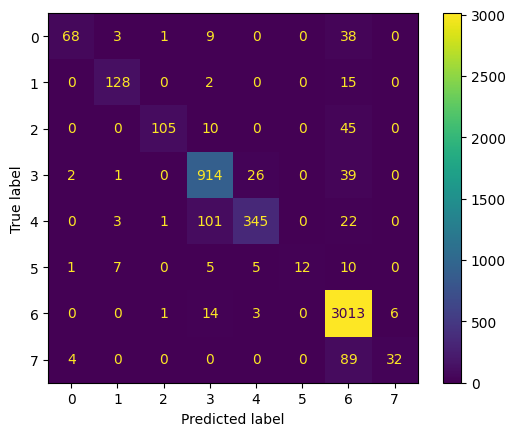

In [28]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

cm_display.figure_.savefig(f'Modelo/confusionMatrix_{NOME}.png')

<span style="font-size:x-large;">**7 - Avaliação de Features**</span>

<span style="font-size:large;">**7.1 - Distribuição de probabilidades dos valores previstos**</span>

In [29]:
test_predictions = y_pred
train_predictions = classifier.predict(X_train)
prediction_probs = classifier.predict_proba(X_test)

In [30]:
#Extrair as probabilidades do modelo, que dizem a confiança do modelo.
predictionProbabilityList = list()
for i, subarr in enumerate(prediction_probs):
    predictionProbabilityList.append(subarr[1])
predictionProbabilityArray = np.asarray(predictionProbabilityList)
predictionProbabilitydf = pd.DataFrame({'true_label': y_test, 'predicted_probability': predictionProbabilityArray})

Text(0.5, 1.0, 'Distribuição de probabilidades dos valores previstos')

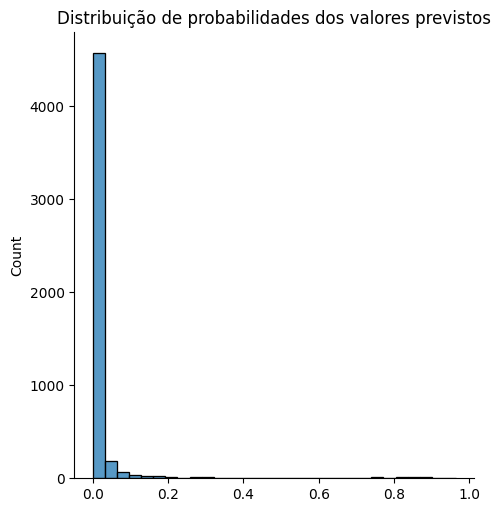

In [31]:
sns.displot(predictionProbabilityArray,bins=30)
plt.title('Distribuição de probabilidades dos valores previstos')

In [32]:
# Exportar
predictionProbabilitydf.to_csv(f'Modelo/ProbabilidadeDePredição_{NOME}.csv', index=False)

<span style="font-size:large;">**7.2 - Permutation Importance**</span>

<span style="font-size:normal;">**7.2.1 - Permutation Based Importance**</span>

In [33]:

%%time
permutation_importance_results = permutation_importance(
    estimator = classifier,
    X = X_test,
    y = y_test,
    scoring = 'accuracy',
    n_repeats = 50)
sorted_idx = permutation_importance_results.importances_mean.argsort()
ImportanciaFeaturesPBI = pd.DataFrame({'Feature':X_test.columns[sorted_idx], 'Importância':permutation_importance_results.importances_mean[sorted_idx]})


CPU times: total: 1h 1min 18s
Wall time: 17min 25s


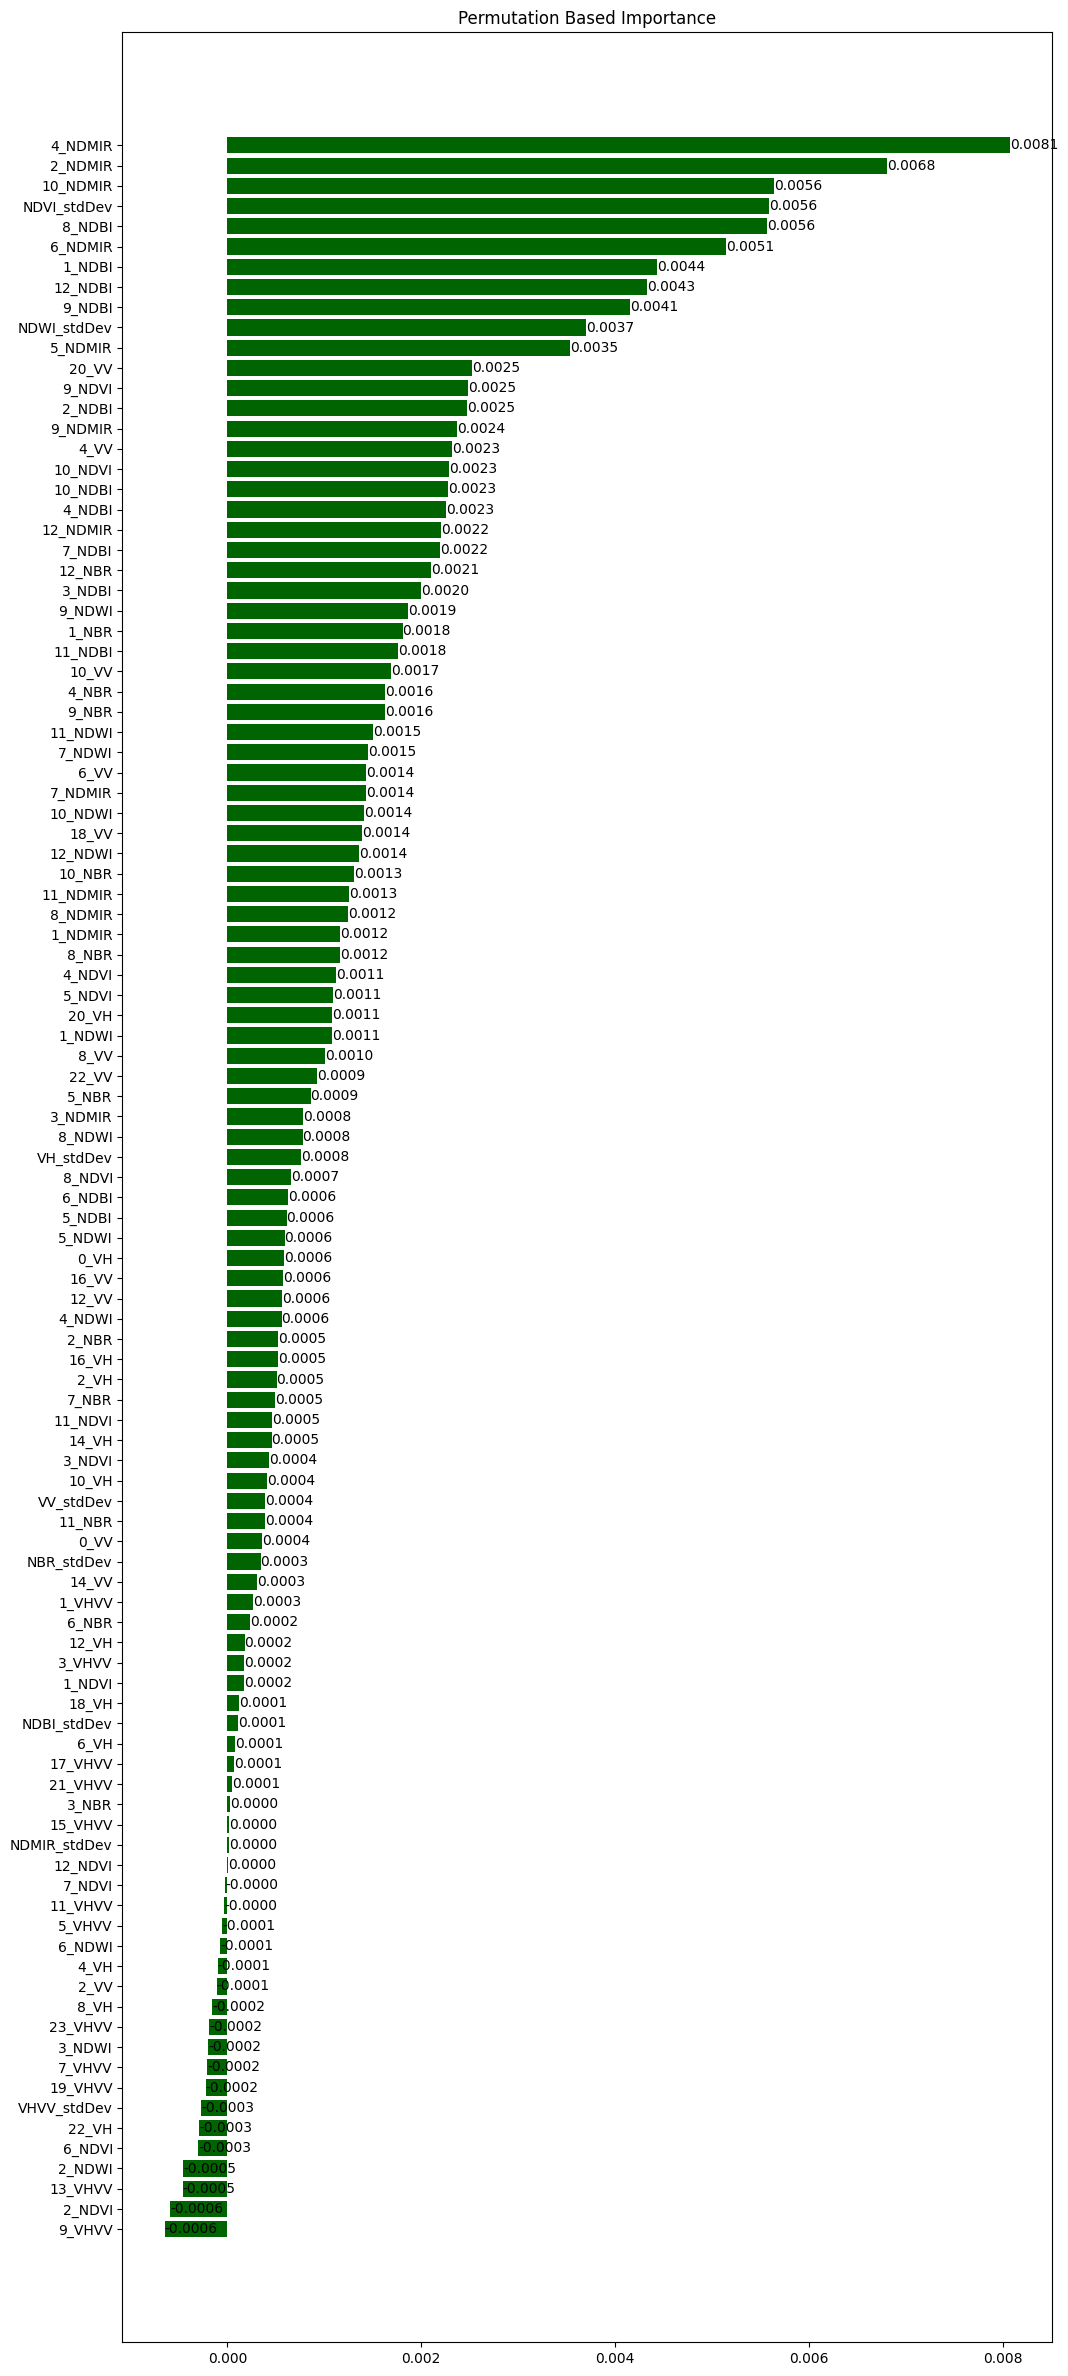

In [34]:
#figura

plt.figure(figsize=(12,30))
bars1 = plt.barh(ImportanciaFeaturesPBI['Feature'],ImportanciaFeaturesPBI['Importância'], color='darkgreen')
plt.title("Permutation Based Importance")
for bar in bars1:
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.4f}', 
        va='center', ha='left'
    )
plt.show()


In [35]:
#Exportar

ImportanciaFeaturesPBI.to_csv(f'Modelo/PBI_{NOME}.csv', index=False)


<span style="font-size:normal;">**7.2.2 - MDI - Mean Decrease Impurity**</span>

In [36]:

%%time
permutation_importance_results_MDI = classifier.feature_importances_
ImportanciaFeaturesMDI = pd.DataFrame({'Feature':X_train.columns, 'Importância':permutation_importance_results_MDI})
ImportanciaFeaturesMDI = ImportanciaFeaturesMDI.sort_values(by='Importância', ascending=True)


CPU times: total: 156 ms
Wall time: 147 ms


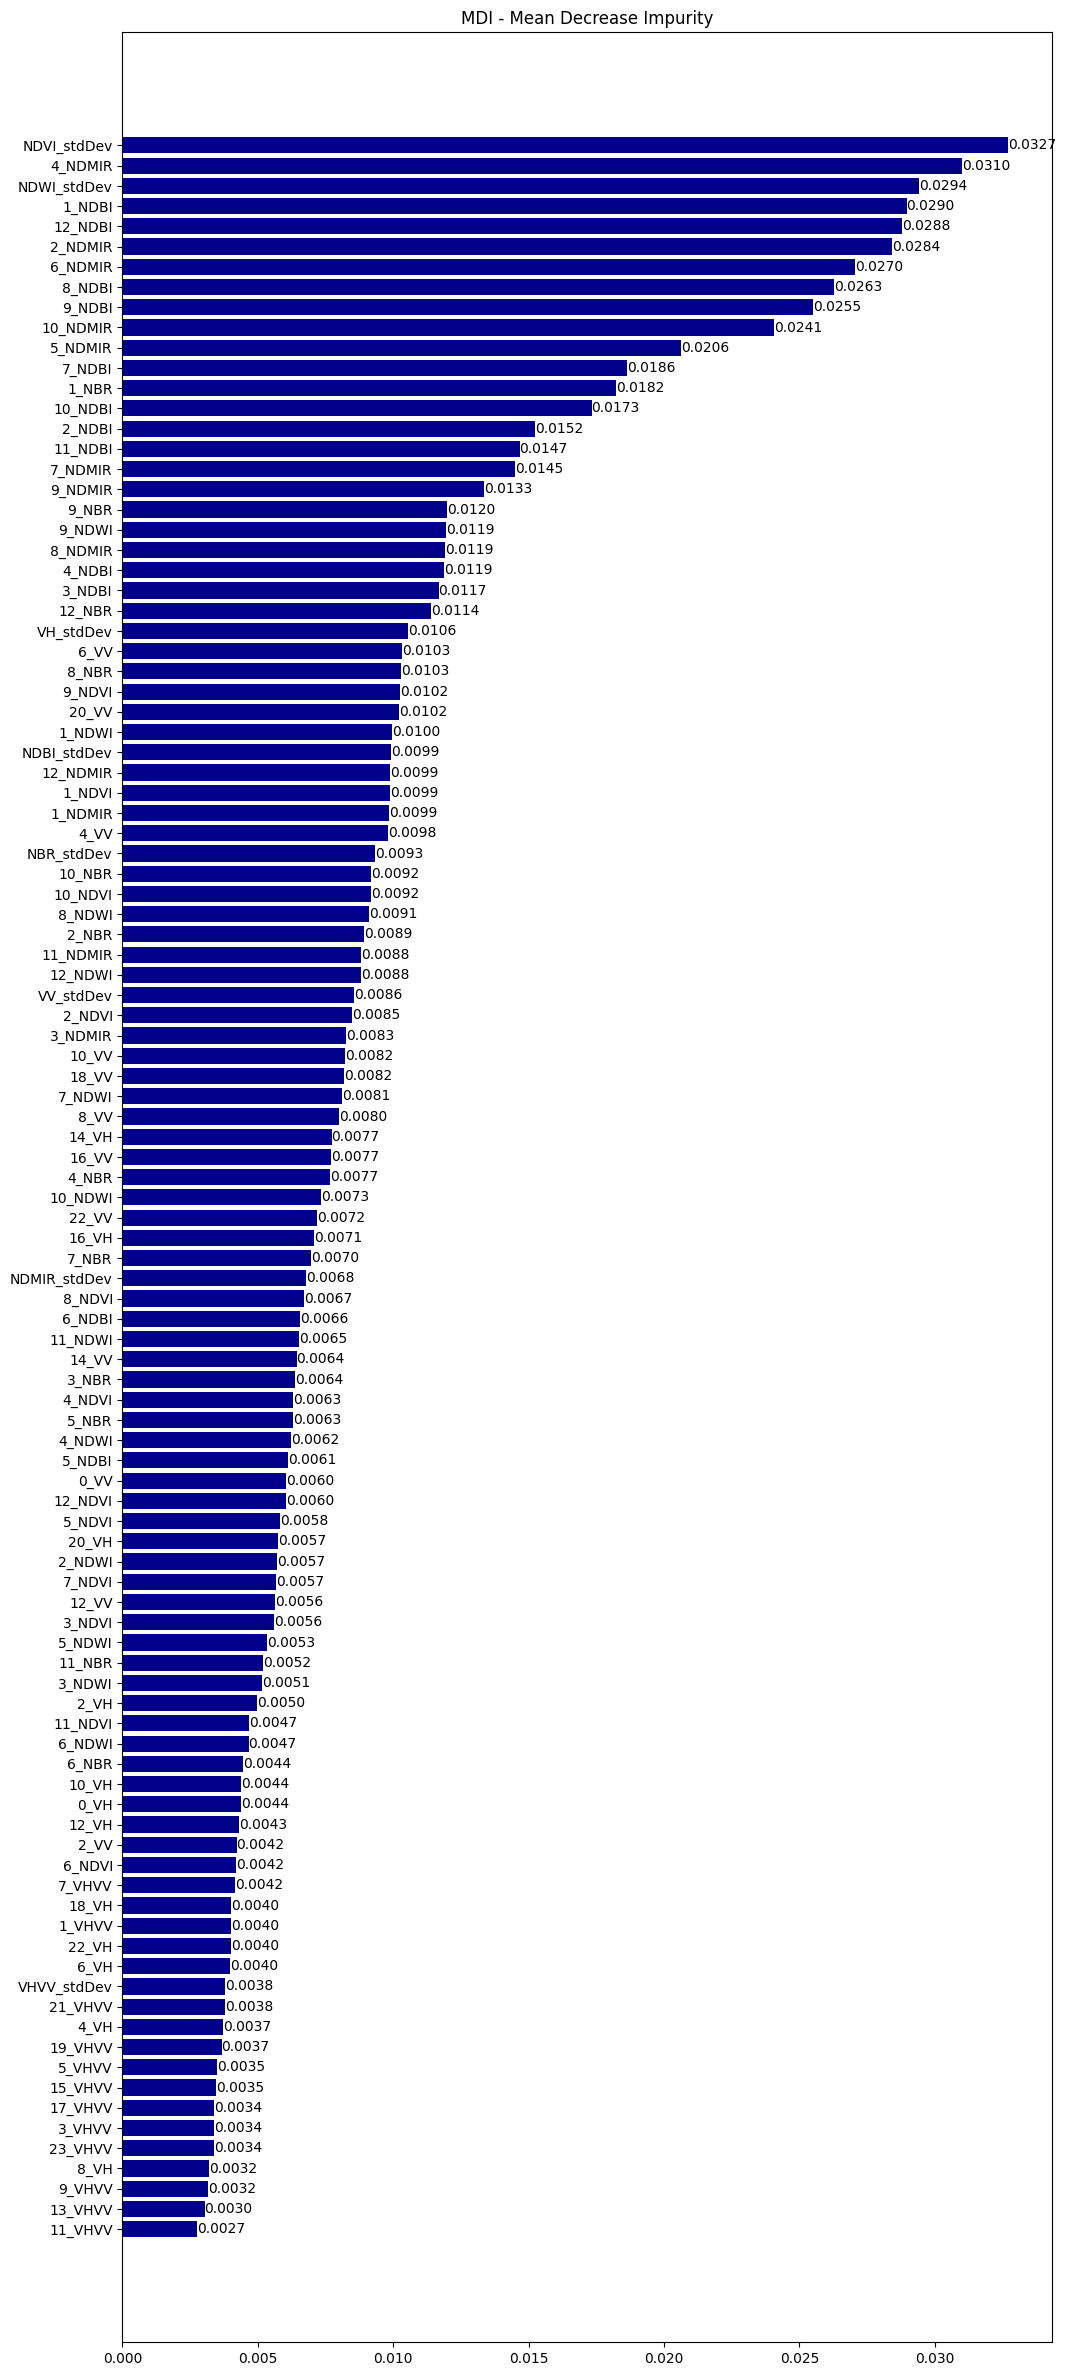

In [37]:
#figura

plt.figure(figsize=(12,30))
bars2 = plt.barh(ImportanciaFeaturesMDI['Feature'], ImportanciaFeaturesMDI['Importância'], color='darkblue')
plt.title("MDI - Mean Decrease Impurity")
for bar in bars2:
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.4f}', 
        va='center', ha='left'
    )
plt.show()


In [38]:
#Exportar

ImportanciaFeaturesMDI.to_csv(f'Modelo/MDI_{NOME}.csv', index=False)


<span style="font-size:normal;">**7.2.3 - MDA - Mean Decrease Accuracy**</span>

In [39]:

%%time
base_accuracy = accuracy_score(y_test, classifier.predict(X_test))
mda_importances = {}

for i, col in enumerate(X_test.columns):
    X_test_permuted = X_test.copy()
    X_test_permuted[col] = np.random.permutation(X_test[col])
    permuted_accuracy = accuracy_score(y_test, classifier.predict(X_test_permuted))
    mda_importances[col] = (base_accuracy - permuted_accuracy) / base_accuracy

ImportanciaFeaturesMDA = pd.DataFrame(list(mda_importances.items()), columns=['Feature', 'MDA'])
ImportanciaFeaturesMDA = ImportanciaFeaturesMDA.sort_values(by='MDA', ascending=True)


CPU times: total: 1min 17s
Wall time: 20.9 s


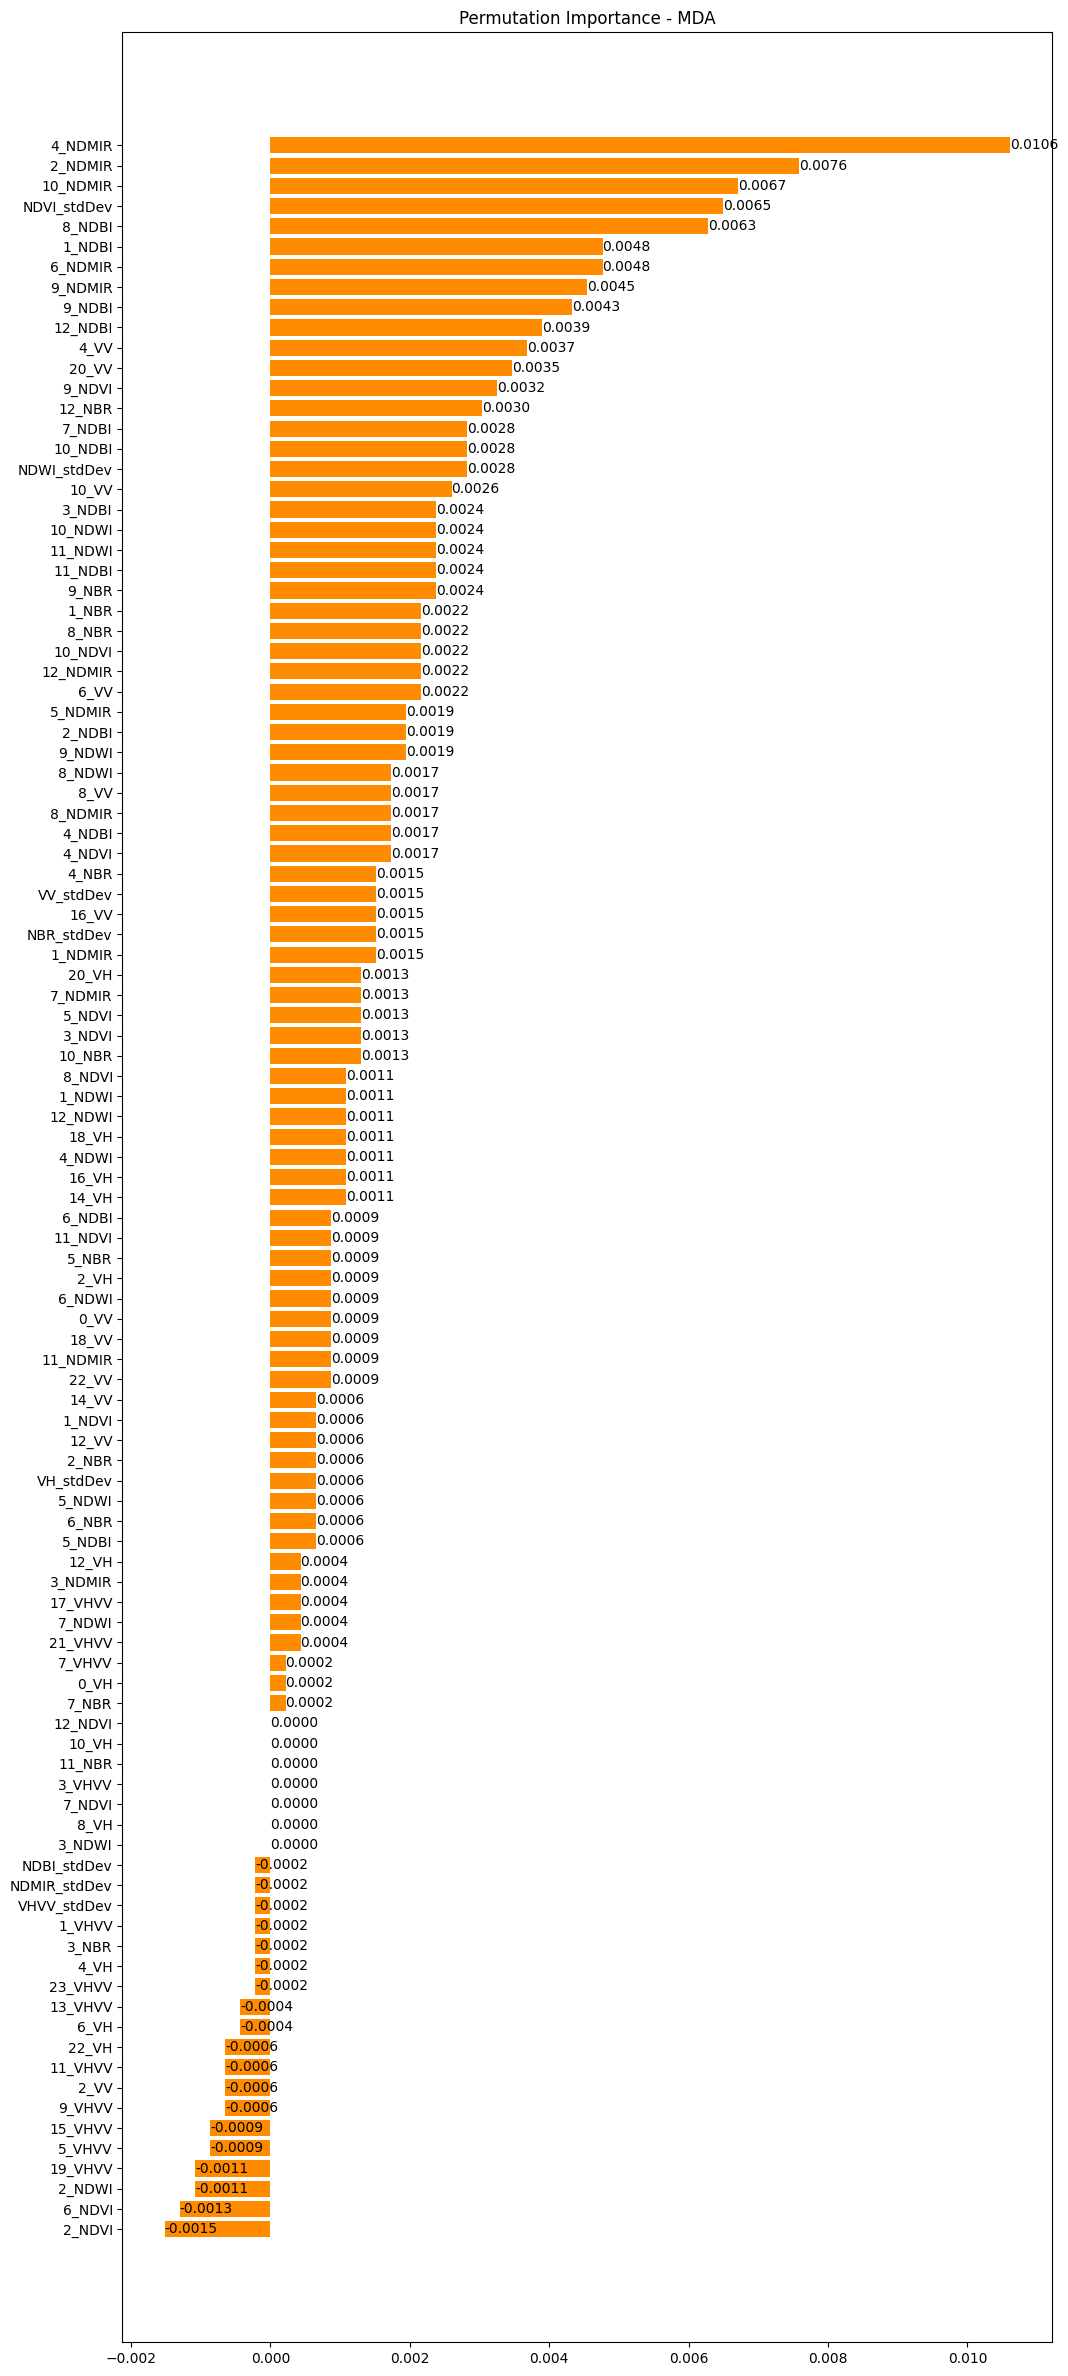

In [40]:
#figura

plt.figure(figsize=(12,30))
bars3 = plt.barh(ImportanciaFeaturesMDA['Feature'], ImportanciaFeaturesMDA['MDA'], color='darkorange')
plt.title("Permutation Importance - MDA")
for bar in bars3:
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.4f}', 
        va='center', ha='left'
    )
plt.show()


In [41]:
#Exportar

ImportanciaFeaturesMDA.to_csv(f'Modelo/MDAdeteste_{NOME}.csv', index=False)


<span style="font-size:x-large;">**8 - Criar Mapa**</span>

<span style="font-size:large;">**8.1 - Criar Mapas todos de uma só vez**</span>

In [42]:

# Caminho para a pasta que contém os stacks
stack_dir = 'Stack/'
output_dir = 'Mapas/Mapas por cluster/'

# Carregar o classificador (substitua isso pelo seu próprio classificador treinado)
# Exemplo: carregar modelo pré-treinado
# classifier = joblib.load('meu_modelo_rf.pkl')

# Inicializar a lista de nomes de colunas que será comparada com as bandas no stack
column_names_pandas = sample_data.columns.tolist()

# Percorrer todos os arquivos .tif na pasta stack
for stack_path in glob.glob(os.path.join(stack_dir, "*.tif")):
    
    # Extrair o nome do stack sem a extensão para nomear o mapa
    nome_stack = os.path.splitext(os.path.basename(stack_path))[0]

    # Abrir o stack de imagens
    rst = rasterio.open(stack_path)
    bandas_stack = rst.descriptions  # Nomes das bandas no stack

    print(f"Processando stack: {nome_stack}")
    print("Bandas no stack:", bandas_stack)
    print("Colunas da amostra:", column_names_pandas)

    # Obter os índices das bandas presentes na lista column_names_pandas que também estão no stack
    stack_data = rst.read()
    indices_selecionados = [bandas_stack.index(banda) for banda in column_names_pandas if banda in bandas_stack]

    print("Índices selecionados:", indices_selecionados)
    print("Número total de bandas no stack:", len(indices_selecionados))

    # Selecionar as bandas apropriadas
    stack_data_selecionado = stack_data[indices_selecionados]

    # Identificar os pixels com NaN (ou seja, NaN em qualquer banda)
    mask_nan = np.any(np.isnan(stack_data_selecionado), axis=0)

    # Substituir os valores NaN temporariamente por um valor que o classificador possa processar
    stack_data_selecionado[np.isnan(stack_data_selecionado)] = 0

    # Redimensione os dados para o formato esperado pelo modelo
    n_bands, n_rows, n_cols = stack_data_selecionado.shape
    reshaped_data = stack_data_selecionado.reshape((n_bands, n_rows * n_cols)).T

    # Realize a classificação
    predicted_labels = classifier.predict(reshaped_data)

    # Redimensione os rótulos classificados de volta ao formato da imagem original
    predicted_labels = predicted_labels.reshape((n_rows, n_cols))

    # **Modificar o tipo para float32 para suportar NaNs**
    predicted_labels = np.array(predicted_labels, dtype=np.float32)

    # Aplicar a máscara de NaNs para garantir que pixels com NaN não sejam classificados
    predicted_labels[mask_nan] = np.nan

    # Redimensionar imagem classificada com base na imagem de entrada
    transform = rst.transform

    # Criar o arquivo GeoTIFF classificado
    output_map_path = os.path.join(output_dir, f'Mapa_{nome_stack}.tif')
    
    with rasterio.open(output_map_path, 'w', driver='GTiff', height=n_rows, width=n_cols, count=1, dtype=np.float32, crs=rst.crs) as dst:
        dst.write(predicted_labels, 1)  # Escreva a imagem classificada
        dst.transform = transform  # Defina a transformação
        dst.crs = rst.crs  # Defina o sistema de coordenadas
    
    print(f"Mapa gerado: {output_map_path}")

print("Classificação de todos os stacks concluída.")


Processando stack: Stack_1
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDVI', '12_NDWI', '12_NBR', '12_NDBI', '12_NDMIR', 'NDVI_s

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_1.tif
Processando stack: Stack_10
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDV

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_10.tif
Processando stack: Stack_11
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_11.tif
Processando stack: Stack_12
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_12.tif
Processando stack: Stack_13
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_13.tif
Processando stack: Stack_14
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_14.tif
Processando stack: Stack_15
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_15.tif
Processando stack: Stack_16
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_16.tif
Processando stack: Stack_17
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_17.tif
Processando stack: Stack_18
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_18.tif
Processando stack: Stack_19
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_19.tif
Processando stack: Stack_2
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDV

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_2.tif
Processando stack: Stack_20
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDV

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_20.tif
Processando stack: Stack_21
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_21.tif
Processando stack: Stack_22
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_22.tif
Processando stack: Stack_23
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_23.tif
Processando stack: Stack_24
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_24.tif
Processando stack: Stack_25
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_25.tif
Processando stack: Stack_26
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_26.tif
Processando stack: Stack_27
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_27.tif
Processando stack: Stack_28
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_28.tif
Processando stack: Stack_29
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_29.tif
Processando stack: Stack_3
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDV

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_3.tif
Processando stack: Stack_30
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDV

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_30.tif
Processando stack: Stack_31
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_31.tif
Processando stack: Stack_32
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_32.tif
Processando stack: Stack_33
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_33.tif
Processando stack: Stack_34
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_34.tif
Processando stack: Stack_35
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_35.tif
Processando stack: Stack_36
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_36.tif
Processando stack: Stack_36b
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_N

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_36b.tif
Processando stack: Stack_37
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_N

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_37.tif
Processando stack: Stack_38
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_ND

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_38.tif
Processando stack: Stack_4
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDV

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_4.tif
Processando stack: Stack_5
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDVI

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_5.tif
Processando stack: Stack_6
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDVI

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_6.tif
Processando stack: Stack_7
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDVI

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_7.tif
Processando stack: Stack_8
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDVI

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_8.tif
Processando stack: Stack_9
Bandas no stack: ('0_VV', '0_VH', '1_VHVV', '2_VV', '2_VH', '3_VHVV', '4_VV', '4_VH', '5_VHVV', '6_VV', '6_VH', '7_VHVV', '8_VV', '8_VH', '9_VHVV', '10_VV', '10_VH', '11_VHVV', '12_VV', '12_VH', '13_VHVV', '14_VV', '14_VH', '15_VHVV', '16_VV', '16_VH', '17_VHVV', '18_VV', '18_VH', '19_VHVV', '20_VV', '20_VH', '21_VHVV', '22_VV', '22_VH', '23_VHVV', '1_NDVI', '1_NDWI', '1_NBR', '1_NDBI', '1_NDMIR', '2_NDVI', '2_NDWI', '2_NBR', '2_NDBI', '2_NDMIR', '3_NDVI', '3_NDWI', '3_NBR', '3_NDBI', '3_NDMIR', '4_NDVI', '4_NDWI', '4_NBR', '4_NDBI', '4_NDMIR', '5_NDVI', '5_NDWI', '5_NBR', '5_NDBI', '5_NDMIR', '6_NDVI', '6_NDWI', '6_NBR', '6_NDBI', '6_NDMIR', '7_NDVI', '7_NDWI', '7_NBR', '7_NDBI', '7_NDMIR', '8_NDVI', '8_NDWI', '8_NBR', '8_NDBI', '8_NDMIR', '9_NDVI', '9_NDWI', '9_NBR', '9_NDBI', '9_NDMIR', '10_NDVI', '10_NDWI', '10_NBR', '10_NDBI', '10_NDMIR', '11_NDVI', '11_NDWI', '11_NBR', '11_NDBI', '11_NDMIR', '12_NDVI

C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Mapa gerado: Mapas/Mapas por cluster/Mapa_Stack_9.tif
Classificação de todos os stacks concluída.


C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


<span style="font-size:large;">**8.1 - Criar Mapa um a um**</span>

In [43]:
'''
#Selecionar stack e nomear mapa

Cluster = 1

#Ver lista de bandas e consideradas no RF
rst = rasterio.open(f'Stack/Stack_{Cluster}.tif')
bandas_stack  = rst.descriptions
column_names_pandas = sample_data.columns.tolist()
print(bandas_stack )
print(column_names_pandas)

# Obter os índices das bandas presentes na lista column_names_pandas que também estão no stack
stack_data = rst.read()
indices_selecionados = [bandas_stack.index(banda) for banda in column_names_pandas if banda in bandas_stack]

print("Índices selecionados:", indices_selecionados)
print("Número total de bandas no stack:", len(indices_selecionados))

stack_data_selecionado = stack_data[indices_selecionados]

# Identificar os pixels com NaN (ou seja, NaN em qualquer banda)
mask_nan = np.any(np.isnan(stack_data_selecionado), axis=0)

# Substituir os valores NaN temporariamente por um valor que o classificador possa processar, por exemplo, zero
stack_data_selecionado[np.isnan(stack_data_selecionado)] = 0

# Classificação da Amostra
# Redimensione os dados para o formato esperado pelo modelo
# Dependendo do seu modelo e dados, você pode precisar ajustar essa etapa
n_bands, n_rows, n_cols = stack_data_selecionado.shape
reshaped_data = stack_data_selecionado.reshape((n_bands, n_rows * n_cols)).T

# Realize a classificação
predicted_labels = classifier.predict(reshaped_data)

# Redimensione os rótulos classificados de volta ao formato da imagem original
predicted_labels = predicted_labels.reshape((n_rows, n_cols))

# **Modificar o tipo para float32 para suportar NaNs**
predicted_labels = np.array(predicted_labels, dtype=np.float32)

# Aplicar a máscara de NaNs para garantir que pixels com NaN não sejam classificados
predicted_labels[mask_nan] = np.nan

# Redimencionar imagem classificada com base na imagem de entrada
#predicted_labels = np.array(predicted_labels, dtype=np.uint8)

transform = rst.transform

# Criar a imagem classificada georreferenciada
with rasterio.open(f'Mapas/Mapas por cluster/MapaAT_{Cluster}.tif', 'w', driver='GTiff', height=n_rows, width=n_cols, count=1, dtype=np.float32, crs=rst.crs) as dst:
    dst.write(predicted_labels, 1)  # Escreva a imagem classificada
    dst.transform = transform  # Defina a transformação
    dst.crs = rst.crs  # Defina o sistema de coordenadas
'''

'\n#Selecionar stack e nomear mapa\n\nCluster = 1\n\n#Ver lista de bandas e consideradas no RF\nrst = rasterio.open(f\'Stack/Stack_{Cluster}.tif\')\nbandas_stack  = rst.descriptions\ncolumn_names_pandas = sample_data.columns.tolist()\nprint(bandas_stack )\nprint(column_names_pandas)\n\n# Obter os índices das bandas presentes na lista column_names_pandas que também estão no stack\nstack_data = rst.read()\nindices_selecionados = [bandas_stack.index(banda) for banda in column_names_pandas if banda in bandas_stack]\n\nprint("Índices selecionados:", indices_selecionados)\nprint("Número total de bandas no stack:", len(indices_selecionados))\n\nstack_data_selecionado = stack_data[indices_selecionados]\n\n# Identificar os pixels com NaN (ou seja, NaN em qualquer banda)\nmask_nan = np.any(np.isnan(stack_data_selecionado), axis=0)\n\n# Substituir os valores NaN temporariamente por um valor que o classificador possa processar, por exemplo, zero\nstack_data_selecionado[np.isnan(stack_data_selecion

<span style="font-size:xx-large;">**REDUÇÃO GRADUAL DA AMOSTRAGEM**</span>

<span style="font-size:xx-large;">**75% da amostragem**</span>

In [44]:
# create the train and test subsets to 75%
X_train75, X_test75, y_train75, y_test75 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.75, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train75.shape,  y_train75.shape)

Train set: (15238, 104) (15238,)


In [45]:
#Contar divisão
y_train75.value_counts()

class
7    8841
4    3027
5    1540
2     478
1     412
3     409
8     376
6     155
Name: count, dtype: int64

<span>**cross validation**</span>

In [46]:
'''
classifier75 = RandomForestClassifier(random_state=42)
'''

'\nclassifier75 = RandomForestClassifier(random_state=42)\n'

In [47]:
'''
CV_rfc75 = GridSearchCV(estimator=classifier75, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc75.fit(X_train75, y_train75)
'''

'\nCV_rfc75 = GridSearchCV(estimator=classifier75, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc75.fit(X_train75, y_train75)\n'

In [48]:
'''
CV_rfc75.best_params_
'''

'\nCV_rfc75.best_params_\n'

In [49]:
'''
classifier75 = CV_rfc75.best_estimator_
'''

'\nclassifier75 = CV_rfc75.best_estimator_\n'

------------------------------------------------------------------------------------

In [50]:

param_gr75 = {
    'n_estimators': 300,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [51]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier75 = RandomForestClassifier(**param_gr75)


<span>**construção do modelo 75**</span>

In [52]:
%%time
classifier75.fit(X_train75, y_train75)

CPU times: total: 2min 16s
Wall time: 11.8 s


RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:large;">**Validação para 75%**</span>

In [53]:
score75 = classifier75.score(X_test, y_test)
print('Average accuracy score: {}'.format(score75))

Average accuracy score: 0.9003937007874016


In [54]:
# Calculate the model save results
y_pred75 = classifier75.predict(X_test)

In [55]:
#report de classificação F1
report75 = classification_report(y_test, y_pred75)
print("Classification Report:\n", report75)

with open(f'Modelo/ClassificationReport75_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report75)

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.52      0.66       119
           2       0.88      0.87      0.88       145
           3       0.97      0.57      0.72       160
           4       0.85      0.93      0.89       982
           5       0.92      0.69      0.79       472
           6       0.85      0.28      0.42        40
           7       0.92      0.99      0.95      3037
           8       0.80      0.22      0.35       125

    accuracy                           0.90      5080
   macro avg       0.88      0.64      0.71      5080
weighted avg       0.90      0.90      0.89      5080



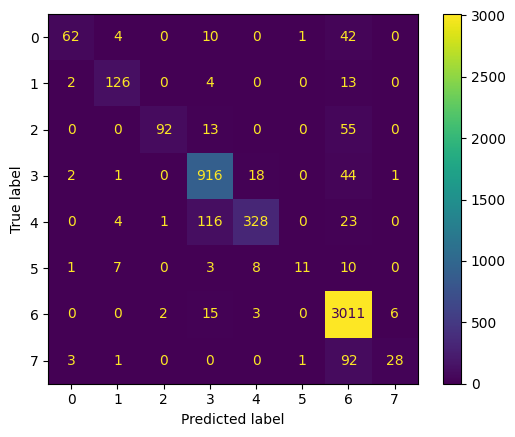

In [56]:
#Matriz de confusão
cm75 = confusion_matrix(y_test, y_pred75)
cm_display75 = ConfusionMatrixDisplay(cm75).plot()

cm_display75.figure_.savefig(f'Modelo/confusionMatrix75_{NOME}.png')

<span style="font-size:xx-large;">**50% da amostragem**</span>

In [57]:
# create the train and test subsets to 50%
X_train50, X_test50, y_train50, y_test50 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.50, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train50.shape,  y_train50.shape)

Train set: (10159, 104) (10159,)


In [58]:
#Contar divisão
y_train50.value_counts()

class
7    5895
4    2018
5    1027
2     318
1     275
3     273
8     250
6     103
Name: count, dtype: int64

<span>**cross validation**</span>

In [59]:
'''
classifier50 = RandomForestClassifier(random_state=42)
'''

'\nclassifier50 = RandomForestClassifier(random_state=42)\n'

In [60]:
'''
CV_rfc50 = GridSearchCV(estimator=classifier50, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc50.fit(X_train50, y_train50)
'''

'\nCV_rfc50 = GridSearchCV(estimator=classifier50, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc50.fit(X_train50, y_train50)\n'

In [61]:
'''
CV_rfc50.best_params_
'''

'\nCV_rfc50.best_params_\n'

In [62]:
'''
classifier50 = CV_rfc50.best_estimator_
'''

'\nclassifier50 = CV_rfc50.best_estimator_\n'

In [63]:

param_gr50 = {
    'n_estimators': 300,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [64]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier50 = RandomForestClassifier(**param_gr50)


<span>**construção do modelo 50**</span>

In [65]:
%%time
classifier50.fit(X_train50, y_train50)

CPU times: total: 1min 25s
Wall time: 7.31 s


RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:large;">**Validação para 50%**</span>

In [66]:
score50 = classifier50.score(X_test, y_test)
print('Average accuracy score: {}'.format(score50))

Average accuracy score: 0.8909448818897637


In [67]:
# Calculate the model save results
y_pred50 = classifier50.predict(X_test)

In [68]:
#report de classificação F1
report50 = classification_report(y_test, y_pred50)
print("Classification Report:\n", report50)

with open(f'Modelo/ClassificationReport50_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report50)

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.46      0.61       119
           2       0.86      0.87      0.86       145
           3       0.97      0.53      0.69       160
           4       0.84      0.91      0.88       982
           5       0.89      0.67      0.76       472
           6       0.89      0.20      0.33        40
           7       0.91      0.99      0.95      3037
           8       0.87      0.21      0.34       125

    accuracy                           0.89      5080
   macro avg       0.89      0.61      0.68      5080
weighted avg       0.89      0.89      0.88      5080



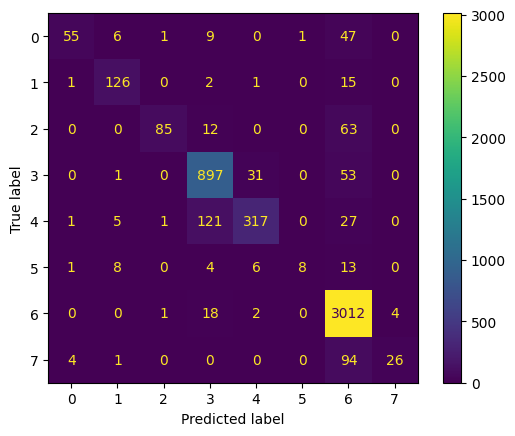

In [69]:
#Matriz de confusão
cm50 = confusion_matrix(y_test, y_pred50)
cm_display50 = ConfusionMatrixDisplay(cm50).plot()

cm_display50.figure_.savefig(f'Modelo/confusionMatrix50_{NOME}.png')

<span style="font-size:xx-large;">**40% da amostragem**</span>

In [70]:
# create the train and test subsets to 50%
X_train40, X_test40, y_train40, y_test40 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.40, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train40.shape,  y_train40.shape)

Train set: (8127, 104) (8127,)


In [71]:
#Contar divisão
y_train40.value_counts()

class
7    4716
4    1614
5     822
2     255
1     220
3     218
8     200
6      82
Name: count, dtype: int64

<span>**cross validation**</span>

In [72]:
'''
classifier40 = RandomForestClassifier(random_state=42)
'''

'\nclassifier40 = RandomForestClassifier(random_state=42)\n'

In [73]:
'''
CV_rfc40 = GridSearchCV(estimator=classifier40, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc40.fit(X_train40, y_train40)
'''

'\nCV_rfc40 = GridSearchCV(estimator=classifier40, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc40.fit(X_train40, y_train40)\n'

In [74]:
'''
CV_rfc40.best_params_
'''

'\nCV_rfc40.best_params_\n'

In [75]:
'''
classifier40 = CV_rfc40.best_estimator_
'''

'\nclassifier40 = CV_rfc40.best_estimator_\n'

In [76]:

param_gr40 = {
    'n_estimators': 500,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [77]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier40 = RandomForestClassifier(**param_gr40)


<span>**construção do modelo 40**</span>

In [78]:
%%time
classifier40.fit(X_train40, y_train40)

CPU times: total: 1min 50s
Wall time: 9.45 s


RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:large;">**Validação para 40%**</span>

In [79]:
score40 = classifier40.score(X_test, y_test)
print('Average accuracy score: {}'.format(score40))

Average accuracy score: 0.8862204724409449


In [80]:
# Calculate the model save results
y_pred40 = classifier40.predict(X_test)

In [81]:
#report de classificação F1
report40 = classification_report(y_test, y_pred40)
print("Classification Report:\n", report40)

with open(f'Modelo/ClassificationReport40_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report40)

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.46      0.60       119
           2       0.87      0.85      0.86       145
           3       0.95      0.51      0.66       160
           4       0.83      0.91      0.87       982
           5       0.89      0.64      0.75       472
           6       0.88      0.17      0.29        40
           7       0.90      0.99      0.95      3037
           8       0.79      0.21      0.33       125

    accuracy                           0.89      5080
   macro avg       0.87      0.59      0.66      5080
weighted avg       0.89      0.89      0.87      5080



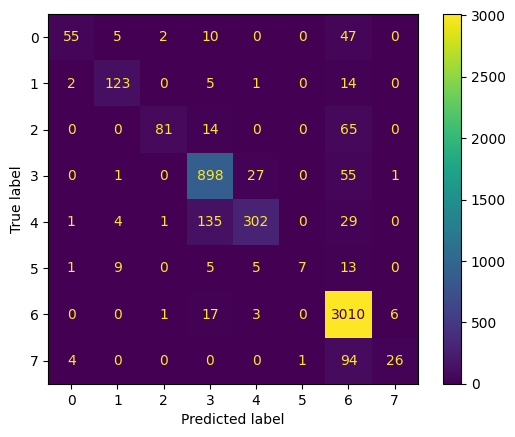

In [82]:
#Matriz de confusão
cm40 = confusion_matrix(y_test, y_pred40)
cm_display40 = ConfusionMatrixDisplay(cm40).plot()

cm_display40.figure_.savefig(f'Modelo/confusionMatrix40_{NOME}.png')

<span style="font-size:xx-large;">**30% da amostragem**</span>

In [83]:
# create the train and test subsets to 50%
X_train30, X_test30, y_train30, y_test30 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.30, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train30.shape,  y_train30.shape)

Train set: (6095, 104) (6095,)


In [84]:
#Contar divisão
y_train30.value_counts()

class
7    3536
4    1211
5     616
2     191
1     165
3     164
8     150
6      62
Name: count, dtype: int64

<span>**cross validation**</span>

In [85]:
'''
classifier30 = RandomForestClassifier(random_state=42)
'''

'\nclassifier30 = RandomForestClassifier(random_state=42)\n'

In [86]:
'''
CV_rfc30 = GridSearchCV(estimator=classifier30, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc30.fit(X_train30, y_train30)
'''

'\nCV_rfc30 = GridSearchCV(estimator=classifier30, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc30.fit(X_train30, y_train30)\n'

In [87]:
'''
CV_rfc30.best_params_
'''

'\nCV_rfc30.best_params_\n'

In [88]:
'''
classifier30 = CV_rfc30.best_estimator_
'''

'\nclassifier30 = CV_rfc30.best_estimator_\n'

In [89]:

param_gr30 = {
    'n_estimators': 200,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [90]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier30 = RandomForestClassifier(**param_gr30)


<span>**construção do modelo 30**</span>

In [91]:
%%time
classifier30.fit(X_train30, y_train30)

CPU times: total: 30.4 s
Wall time: 2.74 s


RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:large;">**Validação para 30%**</span>

In [92]:
score30 = classifier30.score(X_test, y_test)
print('Average accuracy score: {}'.format(score30))

Average accuracy score: 0.8828740157480315


In [93]:
# Calculate the model save results
y_pred30 = classifier30.predict(X_test)

In [94]:
#report de classificação F1
report30 = classification_report(y_test, y_pred30)
print("Classification Report:\n", report30)

with open(f'Modelo/ClassificationReport30_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report30)

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.45      0.60       119
           2       0.82      0.83      0.83       145
           3       0.97      0.49      0.65       160
           4       0.82      0.91      0.86       982
           5       0.91      0.63      0.74       472
           6       1.00      0.15      0.26        40
           7       0.90      0.99      0.94      3037
           8       0.81      0.20      0.32       125

    accuracy                           0.88      5080
   macro avg       0.89      0.58      0.65      5080
weighted avg       0.88      0.88      0.87      5080



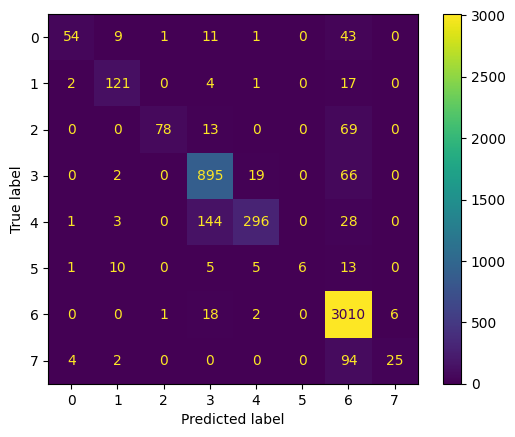

In [95]:
#Matriz de confusão
cm30 = confusion_matrix(y_test, y_pred30)
cm_display30 = ConfusionMatrixDisplay(cm30).plot()

cm_display30.figure_.savefig(f'Modelo/confusionMatrix30_{NOME}.png')

<span style="font-size:xx-large;">**20% da amostragem**</span>

In [96]:
# create the train and test subsets to 20%
X_train20, X_test20, y_train20, y_test20 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.20, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train20.shape,  y_train20.shape)

Train set: (4063, 104) (4063,)


In [97]:
#Contar divisão
y_train20.value_counts()

class
7    2358
4     807
5     411
2     127
1     110
3     109
8     100
6      41
Name: count, dtype: int64

<span>**cross validation**</span>

In [98]:
'''
classifier20 = RandomForestClassifier(random_state=42)
'''

'\nclassifier20 = RandomForestClassifier(random_state=42)\n'

In [99]:
'''
CV_rfc20 = GridSearchCV(estimator=classifier20, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc20.fit(X_train20, y_train20)
'''

'\nCV_rfc20 = GridSearchCV(estimator=classifier20, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc20.fit(X_train20, y_train20)\n'

In [100]:
'''
CV_rfc20.best_params_
'''

'\nCV_rfc20.best_params_\n'

In [101]:
'''
classifier20 = CV_rfc20.best_estimator_
'''

'\nclassifier20 = CV_rfc20.best_estimator_\n'

In [102]:

param_gr20 = {
    'n_estimators': 200,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'gini',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [103]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier20 = RandomForestClassifier(**param_gr20)


<span>**construção do modelo 20**</span>

In [104]:
%%time
classifier20.fit(X_train20, y_train20)

CPU times: total: 11.1 s
Wall time: 1.03 s


RandomForestClassifier(n_estimators=200, n_jobs=12, random_state=42,
                       warm_start=True)

<span style="font-size:large;">**Validação para 20%**</span>

In [105]:
score20 = classifier20.score(X_test, y_test)
print('Average accuracy score: {}'.format(score20))

Average accuracy score: 0.8714566929133858


In [106]:
# Calculate the model save results
y_pred20 = classifier20.predict(X_test)

In [107]:
#report de classificação F1
report20 = classification_report(y_test, y_pred20)
print("Classification Report:\n", report20)

with open(f'Modelo/ClassificationReport20_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report20)

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.38      0.52       119
           2       0.79      0.77      0.78       145
           3       0.94      0.47      0.63       160
           4       0.81      0.90      0.85       982
           5       0.88      0.58      0.70       472
           6       1.00      0.07      0.14        40
           7       0.89      0.99      0.94      3037
           8       0.77      0.18      0.30       125

    accuracy                           0.87      5080
   macro avg       0.86      0.54      0.61      5080
weighted avg       0.87      0.87      0.85      5080



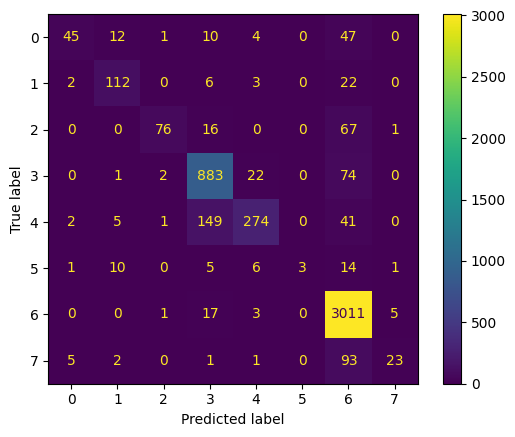

In [108]:
#Matriz de confusão
cm20 = confusion_matrix(y_test, y_pred20)
cm_display20 = ConfusionMatrixDisplay(cm20).plot()

cm_display20.figure_.savefig(f'Modelo/confusionMatrix20_{NOME}.png')

<span style="font-size:xx-large;">**10% da amostragem**</span>

In [109]:
# create the train and test subsets to 20%
X_train10, X_test10, y_train10, y_test10 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.10, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train10.shape,  y_train10.shape)

Train set: (2031, 104) (2031,)


In [110]:
#Contar divisão
y_train10.value_counts()

class
7    1178
4     403
5     205
2      64
3      55
1      55
8      50
6      21
Name: count, dtype: int64

<span>**cross validation**</span>

In [111]:
'''
classifier10 = RandomForestClassifier(random_state=42)
'''

'\nclassifier10 = RandomForestClassifier(random_state=42)\n'

In [112]:
'''
CV_rfc10 = GridSearchCV(estimator=classifier10, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc10.fit(X_train10, y_train10)
'''

'\nCV_rfc10 = GridSearchCV(estimator=classifier10, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc10.fit(X_train10, y_train10)\n'

In [113]:
'''
CV_rfc10.best_params_
'''

'\nCV_rfc10.best_params_\n'

In [114]:
'''
classifier10 = CV_rfc10.best_estimator_
'''

'\nclassifier10 = CV_rfc10.best_estimator_\n'

In [115]:

param_gr10 = {
    'n_estimators': 900,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [116]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier10 = RandomForestClassifier(**param_gr10)


<span>**construção modelo 10**</span>

In [117]:
%%time
classifier10.fit(X_train10, y_train10)

CPU times: total: 36.3 s
Wall time: 3.34 s


RandomForestClassifier(criterion='entropy', n_estimators=900, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:large;">**Validação para 10%**</span>

In [118]:
score10 = classifier10.score(X_test, y_test)
print('Average accuracy score: {}'.format(score10))

Average accuracy score: 0.8505905511811024


In [119]:
# Calculate the model save results
y_pred10 = classifier10.predict(X_test)

In [120]:
#report de classificação F1
report10 = classification_report(y_test, y_pred10)
print("Classification Report:\n", report10)

with open(f'Modelo/ClassificationReport10_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report10)

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.22      0.34       119
           2       0.69      0.71      0.70       145
           3       0.90      0.33      0.48       160
           4       0.80      0.87      0.83       982
           5       0.87      0.57      0.69       472
           6       1.00      0.03      0.05        40
           7       0.87      0.99      0.93      3037
           8       0.56      0.07      0.13       125

    accuracy                           0.85      5080
   macro avg       0.81      0.47      0.52      5080
weighted avg       0.85      0.85      0.83      5080



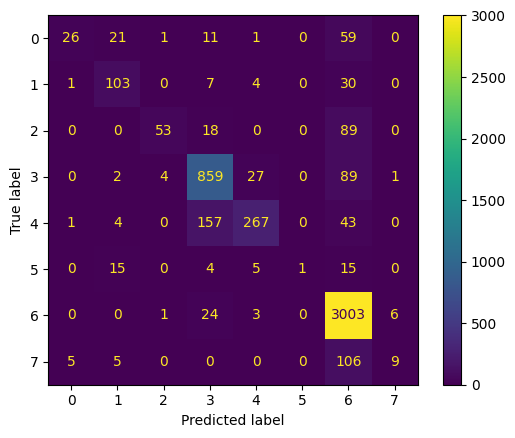

In [121]:
#Matriz de confusão
cm10 = confusion_matrix(y_test, y_pred10)
cm_display10 = ConfusionMatrixDisplay(cm10).plot()

cm_display10.figure_.savefig(f'Modelo/confusionMatrix10_{NOME}.png')

<span style="font-size:xx-large;">**5% da amostragem**</span>

In [122]:
# create the train and test subsets to 20%
X_train5, X_test5, y_train5, y_test5 = train_test_split( 
    X_train, 
    y_train, 
    train_size=0.05, 
    random_state=42,
    stratify=y_train
    )

print ('Train set:', X_train5.shape,  y_train5.shape)

Train set: (1015, 104) (1015,)


In [123]:
#Contar divisão
y_train5.value_counts()

class
7    589
4    202
5    103
2     32
3     27
1     27
8     25
6     10
Name: count, dtype: int64

<span>**cross validation**</span>

In [124]:
'''
classifier5 = RandomForestClassifier(random_state=42)
'''

'\nclassifier5 = RandomForestClassifier(random_state=42)\n'

In [125]:
'''
CV_rfc5 = GridSearchCV(estimator=classifier5, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)
CV_rfc5.fit(X_train5, y_train5)
'''

'\nCV_rfc5 = GridSearchCV(estimator=classifier5, param_grid=param_grCV, cv=5, n_jobs=CPUsselecionados)\nCV_rfc5.fit(X_train5, y_train5)\n'

In [126]:
'''
CV_rfc5.best_params_
'''

'\nCV_rfc5.best_params_\n'

In [127]:
'''
classifier5 = CV_rfc5.best_estimator_
'''

'\nclassifier5 = CV_rfc5.best_estimator_\n'

In [128]:

param_gr5 = {
    'n_estimators': 400,
    'max_features': 'sqrt',
    'max_depth' : None,
    'criterion' :'entropy',
    'min_samples_split':2,
    'min_samples_leaf':1,
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':CPUsselecionados,
    'random_state':42,
    'verbose':0,
    'warm_start':True,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None
}


In [129]:

# Create the RF object. Hyperparameters obtained from Data transformation
classifier5 = RandomForestClassifier(**param_gr5)


<span>**construção do modelo**</span>

In [130]:
%%time
classifier5.fit(X_train5, y_train5)

CPU times: total: 6.33 s
Wall time: 806 ms


RandomForestClassifier(criterion='entropy', n_estimators=400, n_jobs=12,
                       random_state=42, warm_start=True)

<span style="font-size:large;">**Validação para 5%**</span>

In [131]:
score5 = classifier5.score(X_test, y_test)
print('Average accuracy score: {}'.format(score5))

Average accuracy score: 0.8324803149606299


In [132]:
# Calculate the model save results
y_pred5 = classifier5.predict(X_test)

In [133]:
#report de classificação F1
report5 = classification_report(y_test, y_pred5)
print("Classification Report:\n", report5)

with open(f'Modelo/ClassificationReport5_{NOME}.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report5)

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.13      0.22       119
           2       0.65      0.69      0.67       145
           3       0.85      0.22      0.35       160
           4       0.76      0.87      0.81       982
           5       0.86      0.51      0.64       472
           6       0.00      0.00      0.00        40
           7       0.86      0.98      0.92      3037
           8       0.50      0.06      0.10       125

    accuracy                           0.83      5080
   macro avg       0.66      0.43      0.46      5080
weighted avg       0.82      0.83      0.80      5080



C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\isa123713\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

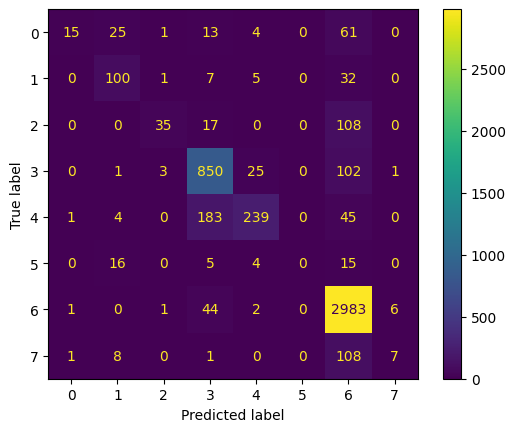

In [134]:
#Matriz de confusão
cm5 = confusion_matrix(y_test, y_pred5)
cm_display5 = ConfusionMatrixDisplay(cm5).plot()

cm_display5.figure_.savefig(f'Modelo/confusionMatrix5_{NOME}.png')

<span style="font-size:xx-large;">**FIM**</span>